## Null Hypothesis: Is there a difference in trip duration between older and younger Citi bike riders?

### H0: Citi bike customers over the age of 40 have a trip duration >= the trip duration of customers under the age of 40
### Ha: Citi bike customers over the age of 40 have a trip duration < the trip duration of customers under the age of 40

In [14]:
# standard imports and setups
%pylab inline

import pylab as pl
import pandas as pd
import numpy as np
import zipfile as zp
import os

Populating the interactive namespace from numpy and matplotlib


In [15]:
path = os.getenv('PUIDATA')+'/'

datestring = '201502'
#bring in the citybike data from February 2015
!wget "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip" -O "{path}{datestring}-citibike-tripdata.zip"

zip = zp.ZipFile(path+datestring+'-citibike-tripdata.zip')
zip.extractall(path)

!rm "{path}{datestring}-citibike-tripdata.zip"

data = pd.read_csv(path+datestring+'-citibike-tripdata.csv')

data.head()

--2016-10-15 19:08:58--  https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
Resolving s3.amazonaws.com... 52.216.225.27
Connecting to s3.amazonaws.com|52.216.225.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4821145 (4.6M) [application/zip]
Saving to: “/home/cusp/tw1574/PUIdata/201502-citibike-tripdata.zip”

100%[======================================>] 4,821,145   30.6M/s   in 0.2s    

2016-10-15 19:08:58 (30.6 MB/s) - “/home/cusp/tw1574/PUIdata/201502-citibike-tripdata.zip” saved [4821145/4821145]



,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [16]:
list(data)


['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [17]:
data = data[['tripduration','birth year']]

data['age'] = 2016 - data['birth year']

data.head(n=10)

,tripduration,birth year,age
0,801,1978.0,38.0
1,379,1993.0,23.0
2,2474,1969.0,47.0
3,818,1985.0,31.0
4,544,1957.0,59.0
5,717,1979.0,37.0
6,1306,1983.0,33.0
7,913,1955.0,61.0
8,759,1985.0,31.0
9,585,1982.0,34.0


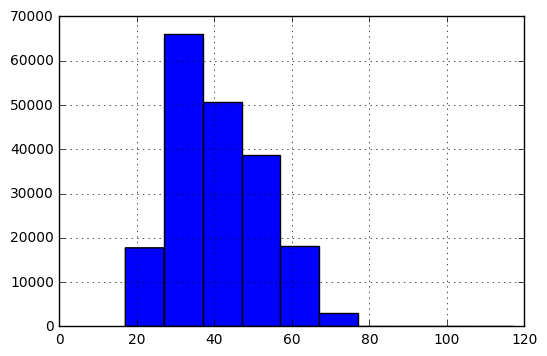

In [18]:
data['age'].hist()

In [19]:
data['age'].mean()

40.711968889824981

#### The above mean helped us to determine the ages to consider for younger vs older riders

In [20]:
data['age'].std()

11.734009212822889

In [21]:
data['over40'] = data['age'] > 40

data.head(n=10)

,tripduration,birth year,age,over40
0,801,1978.0,38.0,False
1,379,1993.0,23.0,False
2,2474,1969.0,47.0,True
3,818,1985.0,31.0,False
4,544,1957.0,59.0,True
5,717,1979.0,37.0,False
6,1306,1983.0,33.0,False
7,913,1955.0,61.0,True
8,759,1985.0,31.0,False
9,585,1982.0,34.0,False


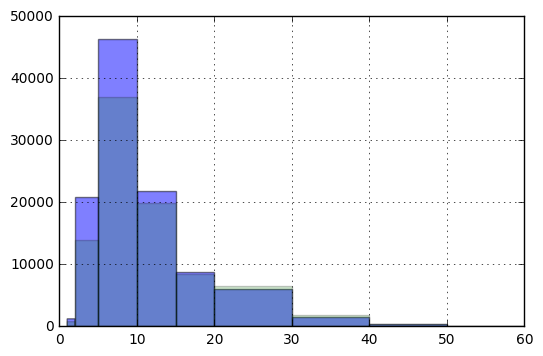

In [22]:
data['tripdurationmins'] = data['tripduration'] / 60
(data['tripdurationmins'][data['over40'] == 0]).hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.5)
(data['tripdurationmins'][data['over40'] == 1]).hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.2)


In [23]:
(data['tripdurationmins'][data['over40'] == 0]).mean()

10.406603084051076

In [24]:
(data['tripdurationmins'][data['over40'] == 1]).mean()

11.324975457535002